In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')

In [23]:
base = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/base_again/SalishSea_1h_20230301_20230301_grid_T.nc')
tands = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands//SalishSea_1h_20230301_20230301_grid_T.nc')
tands5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_5day/SalishSea_1h_20230301_20230305_grid_T.nc')


In [28]:
def plotSumDiff(base, new, t5, field, index1, index2, index3):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff_time1 = sum_diff.isel(time_counter = index1)
    sum_diff_time1.plot(ax=axs[0], y = "deptht", yincrease = False, color = 'blue')
    axs[0].set_title(f'Sum of difference in {field} at {index1}')

    sum_diff_time2 = sum_diff.isel(time_counter = index2)
    sum_diff_time2.plot(ax=axs[1], y = "deptht", yincrease = False, color = 'blue')
    axs[1].set_title(f'Sum of difference in {field} at {index2}')

    sum_diff_time3 = sum_diff.isel(time_counter = index3)
    sum_diff_time3.plot(ax=axs[2], y = "deptht", yincrease = False, color = 'blue')
    axs[2].set_title(f'Sum of difference in {field} at {index3}')

    diff5 = t5[field]- base[field]
    sum_diff5 = diff5.sum(dim = ["y", "x"])
    sum_diff_time5 = sum_diff5.isel(time_counter = index1)
    sum_diff_time5.plot(ax=axs[0], y = "deptht", yincrease = False, color = 'orange')
    axs[0].set_title(f'Sum of difference in {field} at {index1}')

    sum_diff_time6 = sum_diff5.isel(time_counter = index2)
    sum_diff_time6.plot(ax=axs[1], y = "deptht", yincrease = False, color = 'orange')
    axs[1].set_title(f'Sum of difference in {field} at {index2}')

    sum_diff_time7 = sum_diff5.isel(time_counter = index3)
    sum_diff_time7.plot(ax=axs[2], y = "deptht", yincrease = False, color = 'orange')
    axs[2].set_title(f'Sum of difference in {field} at {index3}')


    plt.show()
    


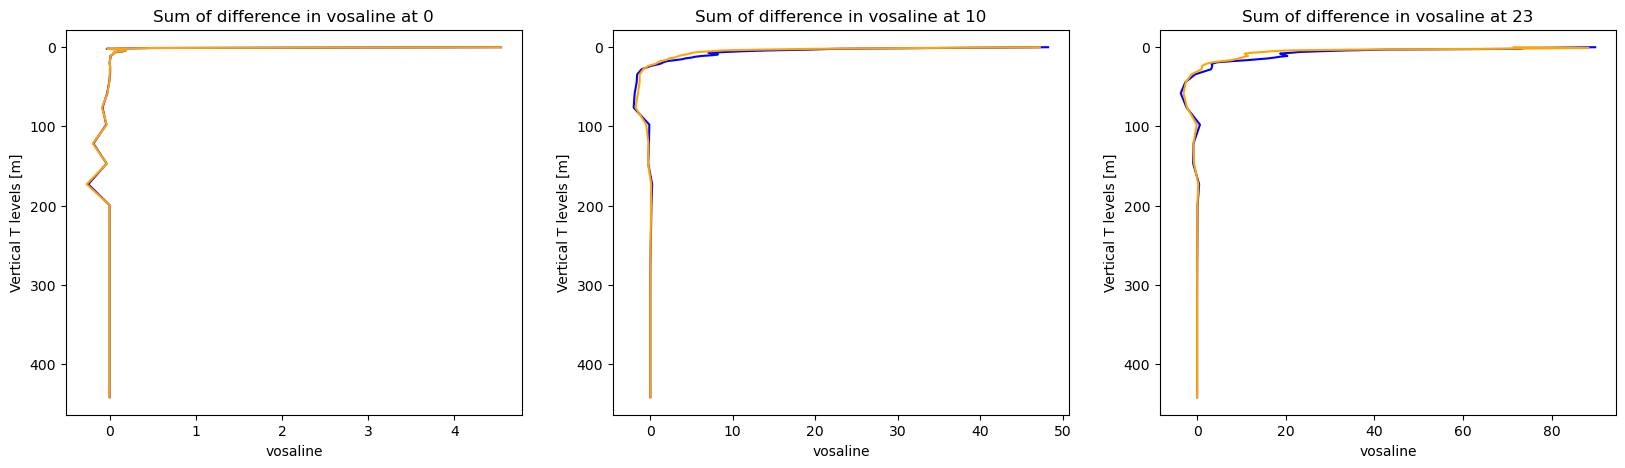

In [29]:

iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)

base1 = base.sel(y = y_slice, x = x_slice)
tands1 = tands.sel(y = y_slice, x = x_slice)
tandsFive = tands5.sel(y = y_slice, x = x_slice)
plotSumDiff(base1, tands1, tandsFive, 'vosaline', 0, 10, 23)

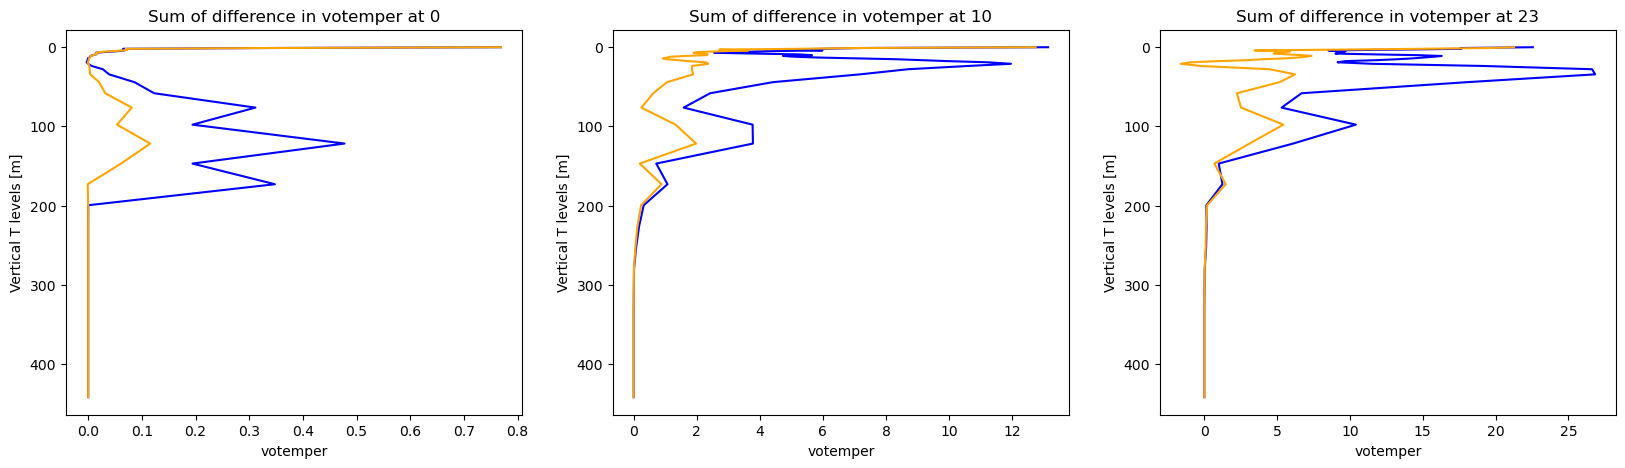

In [31]:
plotSumDiff(base1, tands1, tandsFive, 'votemper', 0, 10, 23)